## Different aquisition functions
Link: https://medium.com/@okanyenigun/step-by-step-guide-to-bayesian-optimization-a-python-based-approach-3558985c6818

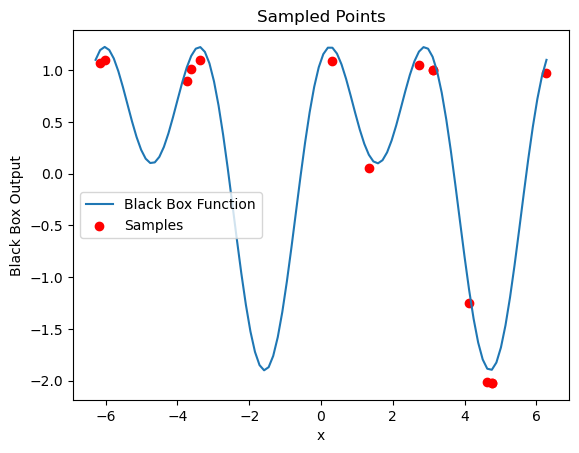

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
np.random.seed(42)

def Objective_function(x):
    noise = normal(loc=0, scale=0.2)
    y = np.sin(x) + np.cos(2*x) + noise
    return y

# range of x values
x_range = np.linspace(-2*np.pi, 2*np.pi, 100)

# output for each x value
y_range = Objective_function(x_range)

# random x values for sampling
num_samples = 15

sample_x = np.random.choice(x_range, size=num_samples)

# output for each sampled x value
sample_y = Objective_function(sample_x) 

# plot
plt.plot(x_range, y_range, label='Black Box Function')
plt.scatter(sample_x, sample_y, color='red', label='Samples')
plt.xlabel('x')
plt.ylabel('Black Box Output')
plt.title('Sampled Points')
plt.legend()
plt.show()

### Guassian Process
* a distribution over functions, where any finite set of function values follows a multivariate Gaussian distribution.
* It is used to model the unkown f(x) and it  provides a posterior distribution over the function values given the observed data.
* GP is speciified by its mena function and covairance.
* Mean represents the expected value of the function at each input point. Covariance characterizes the relationship between different input points and controls the smoothness and behavior of the generated function.
* GP can be used to make predictions about the function values at unobserved points.
#### Advantages of GP
* GP rely on similar inputs lead to similar outputs. This makes Gaussian processes well-suited for detecting patterns and trends in the data when not much prior information is available.
* It adhers Random: uncertainity or randomness, Stationary: process remain constant over time.  it means that the mean, variance, and autocovariance of the process do not change with respect to time or shifts in the time origin.



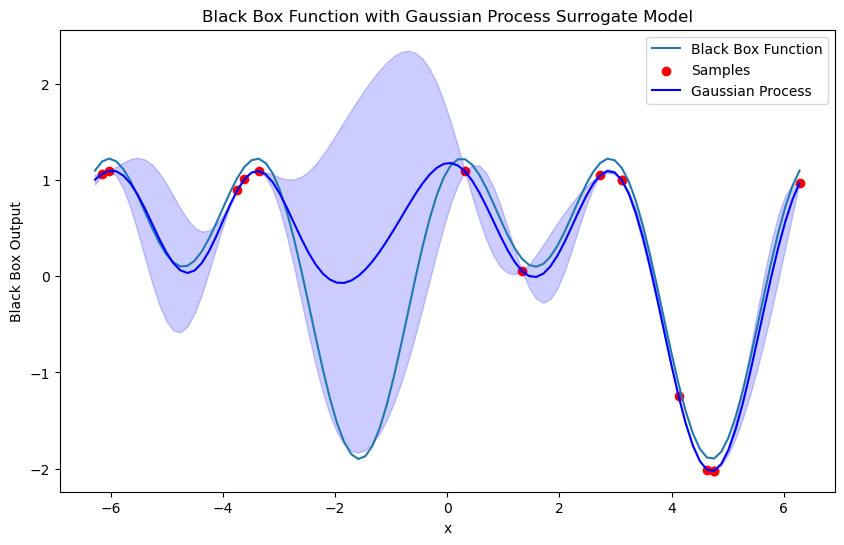

In [46]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Gaussian process regressor with an RBF kernel
kernel = RBF(length_scale=1.0)
gp_model = GaussianProcessRegressor(kernel=kernel)

# Fit the Gaussian process model to the sampled points
gp_model.fit(sample_x.reshape(-1, 1), sample_y)

# Generate predictions using the Gaussian process model
y_pred, y_std = gp_model.predict(x_range.reshape(-1, 1), return_std=True)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='Black Box Function')
plt.scatter(sample_x, sample_y, color='red', label='Samples')
plt.plot(x_range, y_pred, color='blue', label='Gaussian Process')
plt.fill_between(x_range, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2)
plt.xlabel('x')
plt.ylabel('Black Box Output')
plt.title('Black Box Function with Gaussian Process Surrogate Model')
plt.legend()
plt.show()

### Acquisition function
* Acquisition functions determine the next point or set of points to evaluate in the search space.
* The purpose of the acquisition function is to balance exploration and exploitation.
* Predicted values of the surrogate model and the uncertainty associated with those predictions.

Expected Improvement (EI) selects points that have the potential to improve upon the best-observed value. It quantifies the expected improvement over the current best value and considers both the mean prediction of the surrogate model and its uncertainty.

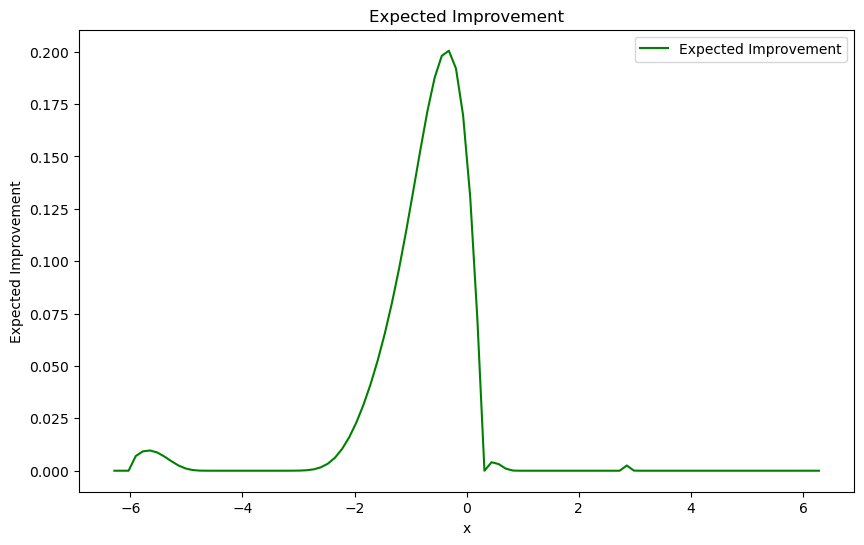

In [47]:
from scipy.stats import norm

def expected_improvement(x, gp_model, best_y):
    y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    z = (y_pred - best_y) / y_std
    ei = (y_pred - best_y) * norm.cdf(z) + y_std * norm.pdf(z)
    return ei

# Determine the point with the highest observed function value
best_idx = np.argmax(sample_y)
best_x = sample_x[best_idx]
best_y = sample_y[best_idx]

ei = expected_improvement(x_range, gp_model, best_y)

# Plot the expected improvement
plt.figure(figsize=(10, 6))
plt.plot(x_range, ei, color='green', label='Expected Improvement')
plt.xlabel('x')
plt.ylabel('Expected Improvement')
plt.title('Expected Improvement')
plt.legend()
plt.show()

Upper Confidence Bound (UCB) trades off exploration and exploitation by balancing the mean prediction of the surrogate model and an exploration term proportional to the uncertainty. It selects points that offer a good balance between predicted high values and exploration of uncertain regions.

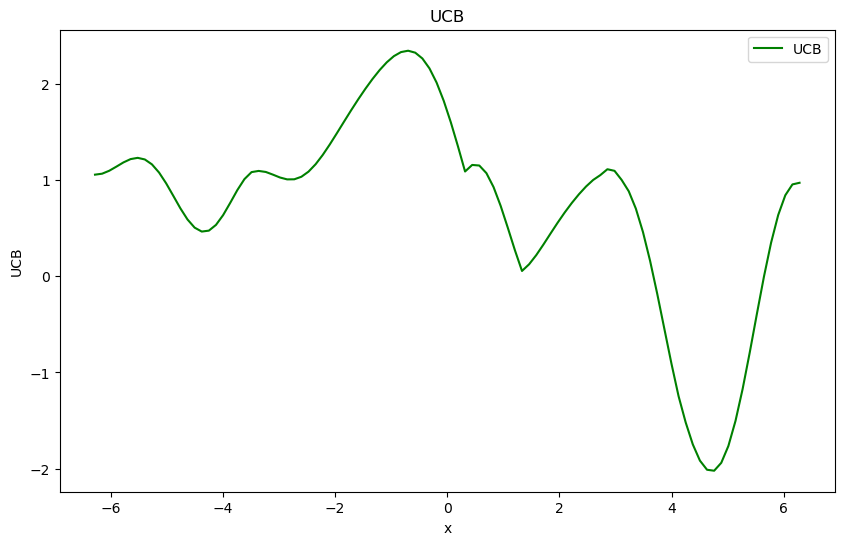

In [48]:
def upper_confidence_bound(x, gp_model, beta):
    y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    ucb = y_pred + beta * y_std
    return ucb

beta = 2.0

# UCB
ucb = upper_confidence_bound(x_range, gp_model, beta)

plt.figure(figsize=(10, 6))
plt.plot(x_range, ucb, color='green', label='UCB')
plt.xlabel('x')
plt.ylabel('UCB')
plt.title('UCB')
plt.legend()
plt.show()

Probability of Improvement (PI) estimates the probability that a point will improve upon the current best value. It considers the difference between the mean prediction and the current best value, taking into account the uncertainty in the surrogate model.

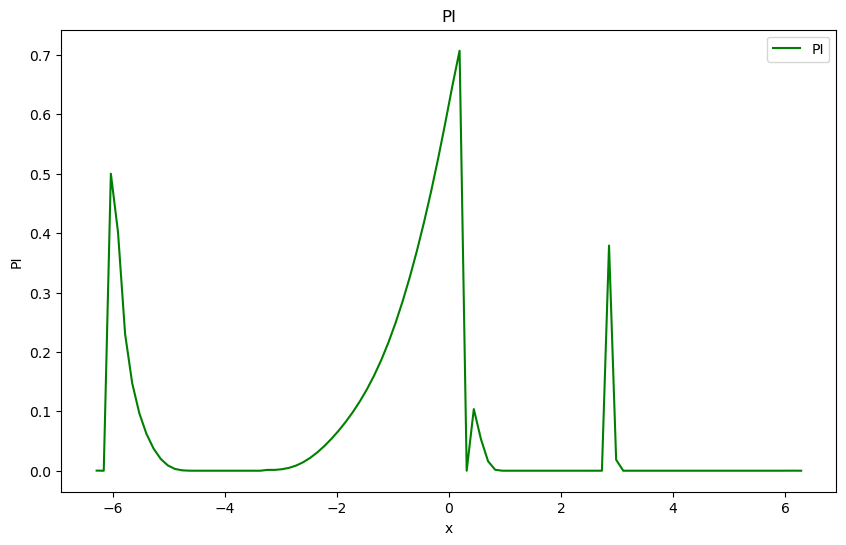

In [49]:
def probability_of_improvement(x, gp_model, best_y):
    y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    z = (y_pred - best_y) / y_std
    pi = norm.cdf(z)
    return pi

# Probability of Improvement
pi = probability_of_improvement(x_range, gp_model, best_y)


plt.figure(figsize=(10, 6))
plt.plot(x_range, pi, color='green', label='PI')
plt.xlabel('x')
plt.ylabel('PI')
plt.title('PI')
plt.legend()
plt.show()

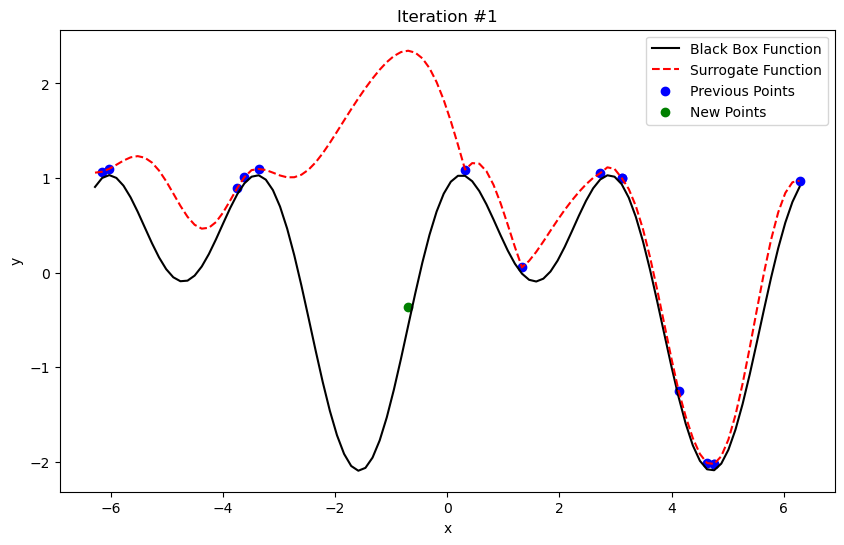

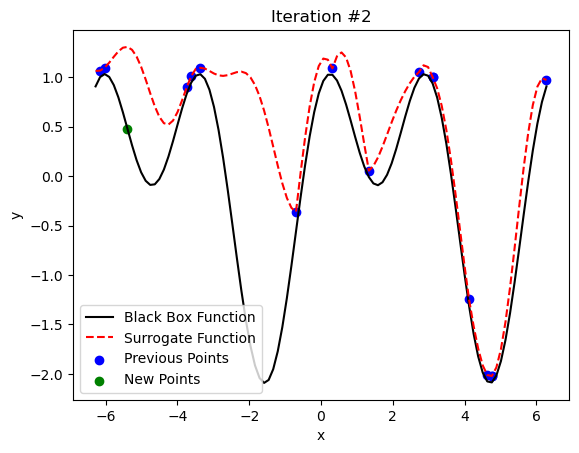

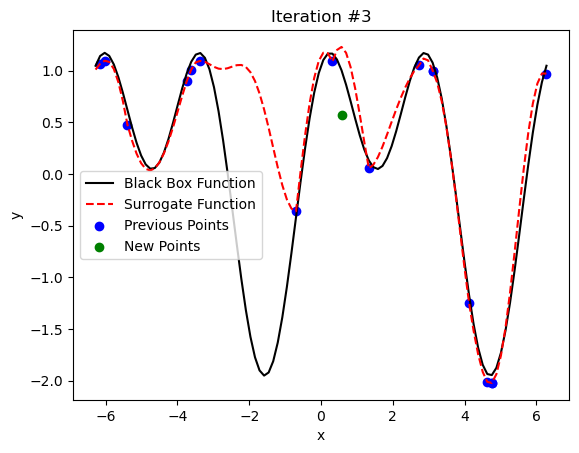

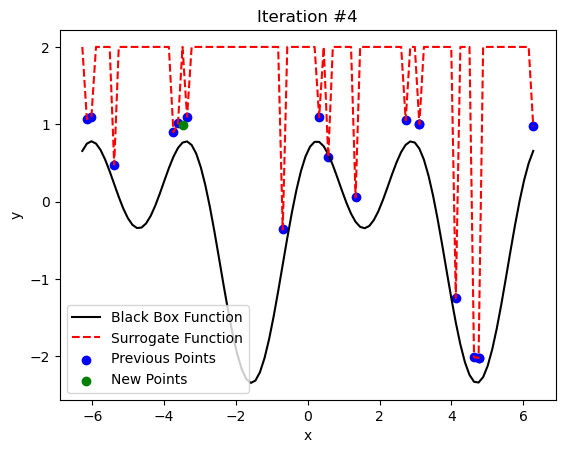

c:\Users\shail\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


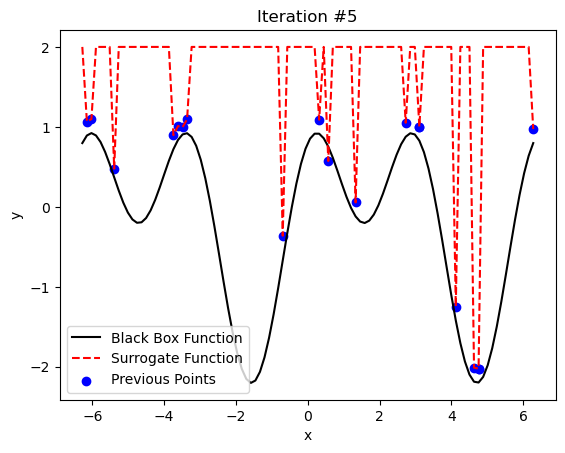

In [50]:
num_iterations = 5

plt.figure(figsize=(10, 6))

for i in range(num_iterations):
    # Fit the Gaussian process model to the sampled points
    gp_model.fit(sample_x.reshape(-1, 1), sample_y)

    # Determine the point with the highest observed function value
    best_idx = np.argmax(sample_y)
    best_x = sample_x[best_idx]
    best_y = sample_y[best_idx]

    # Set the value of beta for the UCB acquisition function
    beta = 2.0

    # Generate the Upper Confidence Bound (UCB) using the Gaussian process model
    ucb = upper_confidence_bound(x_range, gp_model, beta)

    # Plot the black box function, surrogate function, previous points, and new points
    plt.plot(x_range, Objective_function(x_range), color='black', label='Black Box Function')
    plt.plot(x_range, ucb, color='red', linestyle='dashed', label='Surrogate Function')
    plt.scatter(sample_x, sample_y, color='blue', label='Previous Points')
    if i < num_iterations - 1:
        new_x = x_range[np.argmax(ucb)]  # Select the next point based on UCB
        new_y = Objective_function(new_x)
        sample_x = np.append(sample_x, new_x)
        sample_y = np.append(sample_y, new_y)
        plt.scatter(new_x, new_y, color='green', label='New Points')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Iteration #{i+1}")
    plt.legend()
    plt.show()